In [19]:
# Import required libraries
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
from sklearn import metrics
import statsmodels.api as sm

## Data Loading and Visualization

In [2]:
# Read salary data
file_path = Path("Resources/global-data-on-sustainable-energy (1).csv")
df_energy = pd.read_csv(file_path)

# Display sample data
df_energy.head(2)

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,...,302.59482,1.64,760.0,NaN,NaN,NaN,60,"6,52,230",33.93911,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,...,236.89185,1.74,730.0,NaN,NaN,NaN,60,"6,52,230",33.93911,67.709953


In [3]:
df_energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 21 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            3649 non-null   object 
 1   Year                                                              3649 non-null   int64  
 2   Access to electricity (% of population)                           3639 non-null   float64
 3   Access to clean fuels for cooking                                 3480 non-null   float64
 4   Renewable-electricity-generating-capacity-per-capita              2718 non-null   float64
 5   Financial flows to developing countries (US $)                    1560 non-null   float64
 6   Renewable energy share in the total final energy consumption (%)  3455 non-null   float64
 7   Electricity from fossil fuels (TW

#### Rename Columns

In [4]:
# Dictionary to map old column names to new column names
column_name_mapping = {
    'Electricity from fossil fuels (TWh)': 'Elec from fossil fuels',
    'Electricity from nuclear (TWh)': 'Elec from nuclear',
    'Electricity from renewables (TWh)': 'Elect from renewables',
    'Value_co2_emissions_kt_by_country': 'CO2 Emissions'
}

# Rename specific columns using the rename() method
df_energy.rename(columns=column_name_mapping, inplace=True)

#### Understanding the Data Set

In [5]:
columns_for_pairplot = ['Elec from fossil fuels', 'Elec from nuclear', 'Elect from renewables', 'CO2 Emissions']

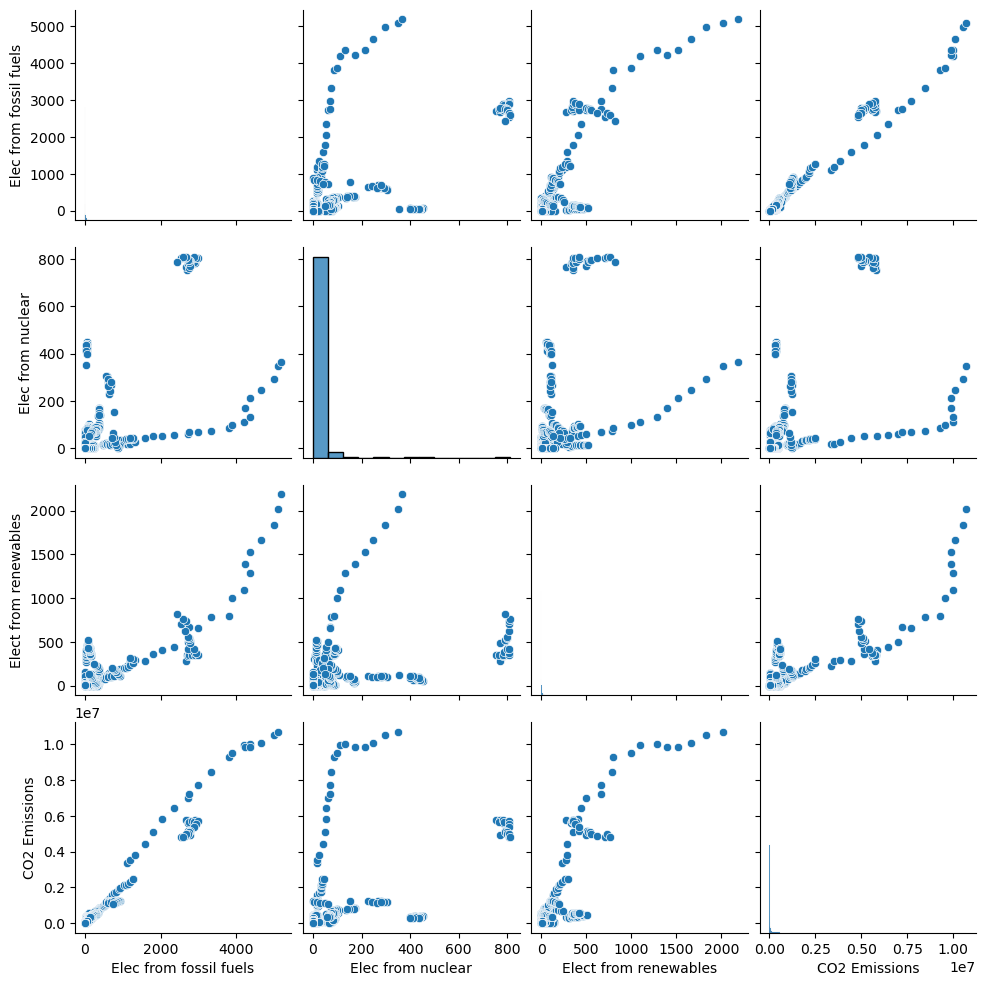

In [6]:
sns.pairplot(df_energy[columns_for_pairplot])

#### Drop Nulls from Columns

In [7]:
columns_to_clean = ['Elec from fossil fuels', 'Elec from nuclear', 'Elect from renewables', 'CO2 Emissions']
df_energy_cleaned = df_energy.dropna(subset=columns_to_clean)

### Linear Regression Model

In [8]:
x = df_energy_cleaned[['Elec from fossil fuels', 'Elec from nuclear', 'Elect from renewables']]
y = df_energy_cleaned['CO2 Emissions']

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)
model = LinearRegression()
model.fit(x_train, y_train)
print(model.coef_)

[2112.21801089 -738.12061878  695.03174873]


In [10]:
print(model.intercept_)

822.4969905051112


In [11]:
pd.DataFrame(model.coef_, x.columns, columns = ['Coeff'])

,Coeff
Elec from fossil fuels,2112.218011
Elec from nuclear,-738.120619
Elect from renewables,695.031749


In [12]:
predictions = model.predict(x_test)

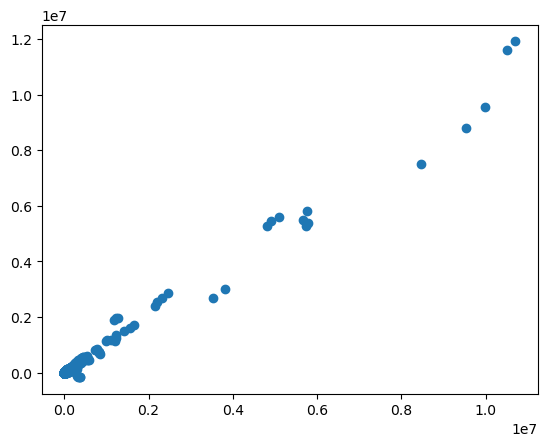

In [13]:
plt.scatter(y_test, predictions)

(array([  2.,   0.,   4.,   5.,   6., 893.,   9.,   7.,   1.,   4.]),
 array([-1204962.32475946,  -988759.38549966,  -772556.44623986,
         -556353.50698005,  -340150.56772025,  -123947.62846045,
           92255.31079935,   308458.25005915,   524661.18931895,
          740864.12857875,   957067.06783856]),
 <BarContainer object of 10 artists>)

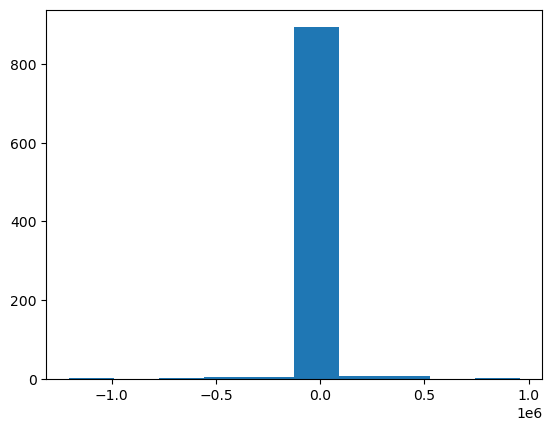

In [14]:
plt.hist(y_test - predictions)

#### Ordinary Least Squares(OLS)

In [15]:
model = sm.OLS(y, x)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:          CO2 Emissions   R-squared (uncentered):                   0.985
Model:                            OLS   Adj. R-squared (uncentered):              0.985
Method:                 Least Squares   F-statistic:                          6.715e+04
Date:                Tue, 29 Aug 2023   Prob (F-statistic):                        0.00
Time:                        16:08:24   Log-Likelihood:                         -40066.
No. Observations:                3101   AIC:                                  8.014e+04
Df Residuals:                    3098   BIC:                                  8.016e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------

### Filtering by Country

#### CO2 Emissions China - Timeseries Data

In [16]:
df_emissions_country = df_energy_cleaned[df_energy_cleaned["Entity"] == 'China']

C:\Users\61450\AppData\Local\Temp\ipykernel_18776\922777696.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_emissions_country['emissions_lag_1'] = df_energy_cleaned['CO2 Emissions'].shift(1)


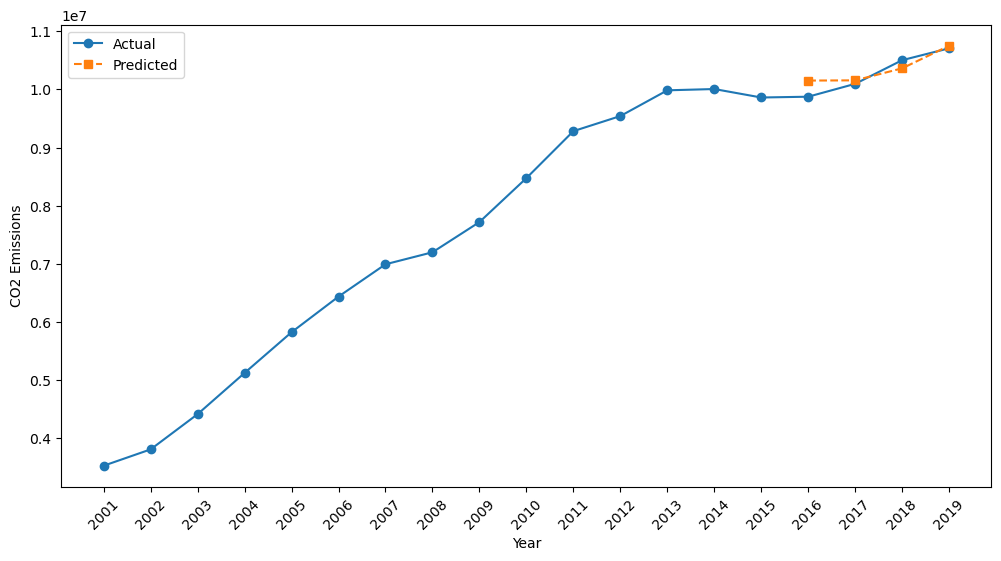

In [17]:
# Feature engineering (adding lag features)
df_emissions_country['emissions_lag_1'] = df_energy_cleaned['CO2 Emissions'].shift(1)

df_emissions_country_cleaned = df_emissions_country[1:]

# Split data into training and testing sets
train_data, test_data = train_test_split(df_emissions_country_cleaned, test_size=0.2, shuffle=False)

# Create feature matrix and target variable
X_train = train_data[['Year', 'emissions_lag_1']].values
y_train = train_data['CO2 Emissions'].values

X_test = test_data[['Year', 'emissions_lag_1']].values
y_test = test_data['CO2 Emissions'].values

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Visualization
x_values = df_emissions_country_cleaned['Year']

plt.figure(figsize=(12, 6))
plt.plot(df_emissions_country_cleaned['Year'], df_emissions_country_cleaned['CO2 Emissions'], label='Actual', marker='o')
plt.plot(test_data['Year'], y_pred, label='Predicted', linestyle='dashed', marker='s')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions')
plt.legend()
plt.xticks(x_values, rotation=45) # Rotate the labels for better visibility
plt.show()

In [20]:
# Compute the metrics for the linear regression model
score = model.score(X_train, y_train, sample_weight=None)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
std = np.std(y_test)
r2 = r2_score(y_test, y_pred)

In [21]:
# Print relevant metrics.
print(f"The score is {score}.")
print(f"The r2 is {r2}.")
print(f"The mean squared error is {mse}.")
print(f"The root mean squared error is {rmse}.")
print(f"The standard deviation is {std}.")

The score is 0.9861650264046897.
The r2 is 0.7621288842394192.
The mean squared error is 25537985118.557167.
The root mean squared error is 159806.08598722756.
The standard deviation is 327659.2704480525.
